In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle
import h5py

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib import cm
viridis = cm.get_cmap('viridis', 12)
# from check_collision import check_all_collisions
# from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'


    

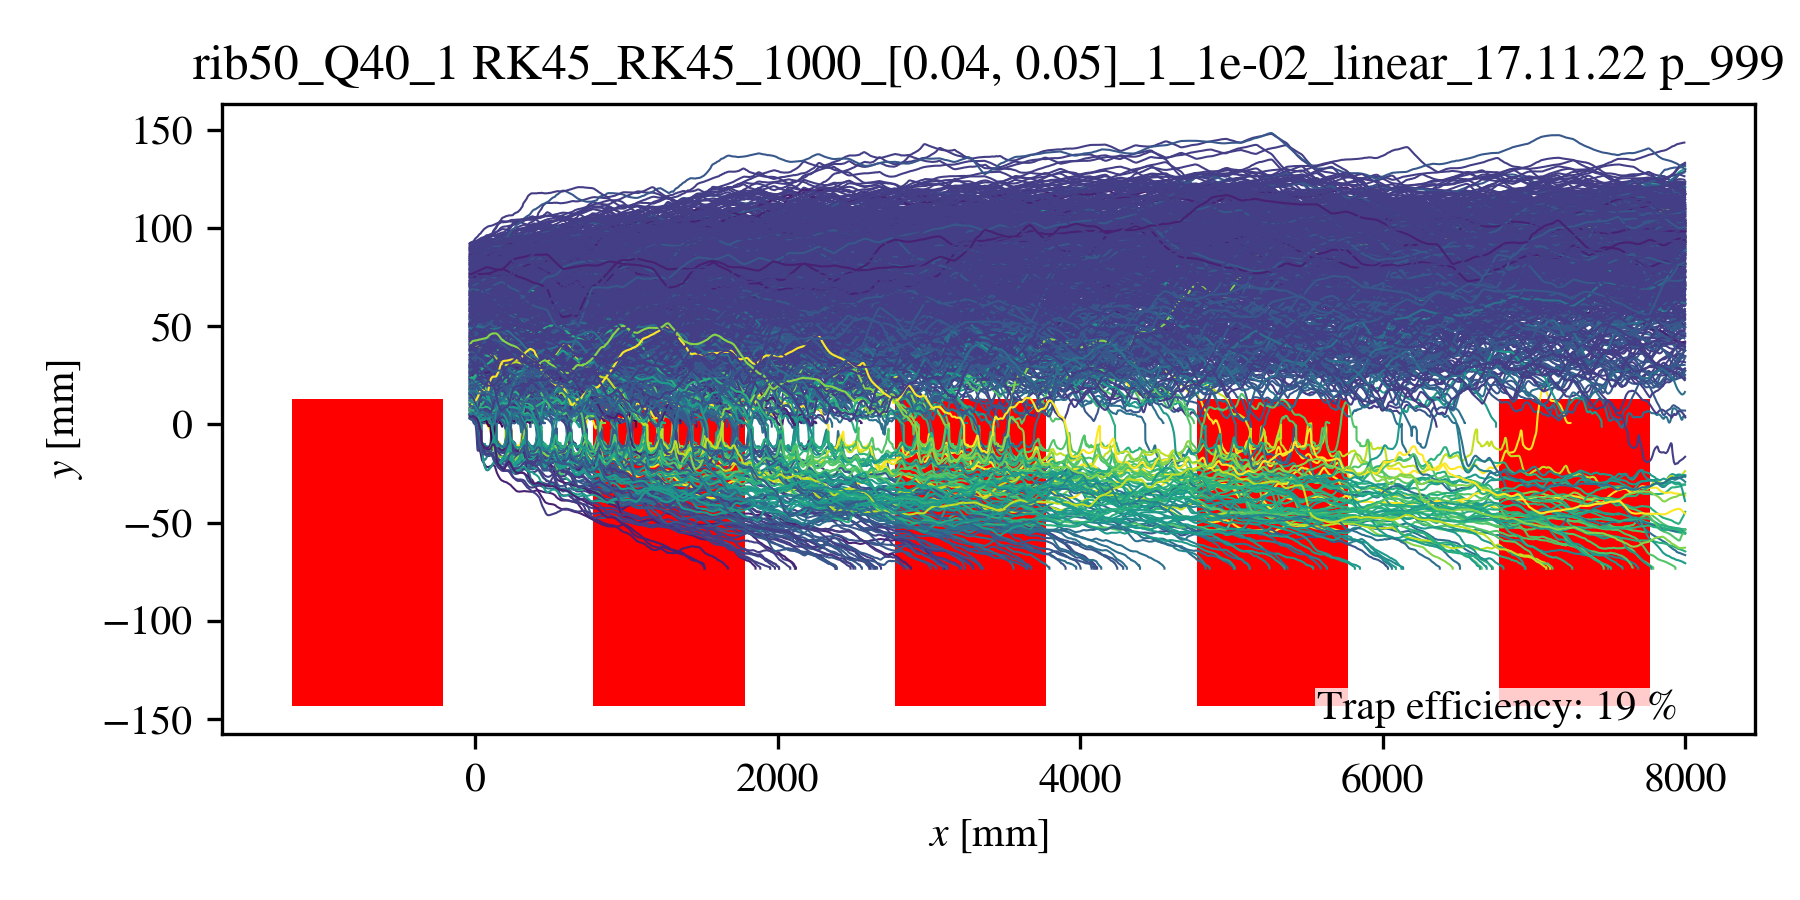

In [6]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in sorted(Path("./runs/rib50_Q40_1/").rglob("*_[0.04*.11.22.pickle")):
   # if not partikkelfil.name == "RK45_RK45_50_[0.05, 0.06]_1_1e-02_linear_test25.10.22.pickle":
    #    continue
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)

    tider = {}
    max_time = 0
    for p in partiklar:
        tider[p.index] = p.sti_dict['time_usage'].seconds
        if tider[p.index] > max_time:
            max_time = tider[p.index]

    skalering = 1
    myDPI = 300
    with h5py.File(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"),'r') as fil:
        h5py_ribs = np.asarray(fil['ribs'])
    del fil

    ribs = []
    for r in h5py_ribs:
        ribs.append(Rib(r))
    
    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(1800/myDPI,900/myDPI),dpi=myDPI)
    ax.add_patch(Polygon(ribs[1].vertices- np.asarray([x_width, 0]), facecolor='red'))
    for i in range(int(8000/x_width)):
        ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))
        
    fanga = 0
    ufanga = 0

    for p in partiklar:
        # if p.index > 200:
        #     break
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])+np.asarray([sti[frame]['loops']*x_width,0,0,0])
        # if not np.any(plott_array[:,1]<1):
        #      continue
        if sti[final]['caught']:
            fanga += 1
        else:
            ufanga += 1
        # color = viridis((p.diameter-0.05)/0.01)
        color = viridis(tider[p.index]/max_time)
        ax.plot(plott_array[:,0], plott_array[:,1], linewidth=0.5, label=p.index, color=color)
    ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    ax.set_xlabel(r'$x$ [mm]')
    ax.set_ylabel(r'$y$ [mm]')
    ax.text(0.95, 0.01, f"Trap efficiency: {100*fanga/(ufanga+fanga):.0f} %",
        verticalalignment='bottom', horizontalalignment='right',bbox={'facecolor': 'white','edgecolor':'None', 'alpha': 0.8, 'pad': 0.5},
        transform=ax.transAxes)
    # ax.legend(ncol=6, loc=2, bbox_to_anchor=(0, -0.15))
    # if p.index > 0:
    plt.tight_layout()

In [3]:
# sti[final]
ufanga

166

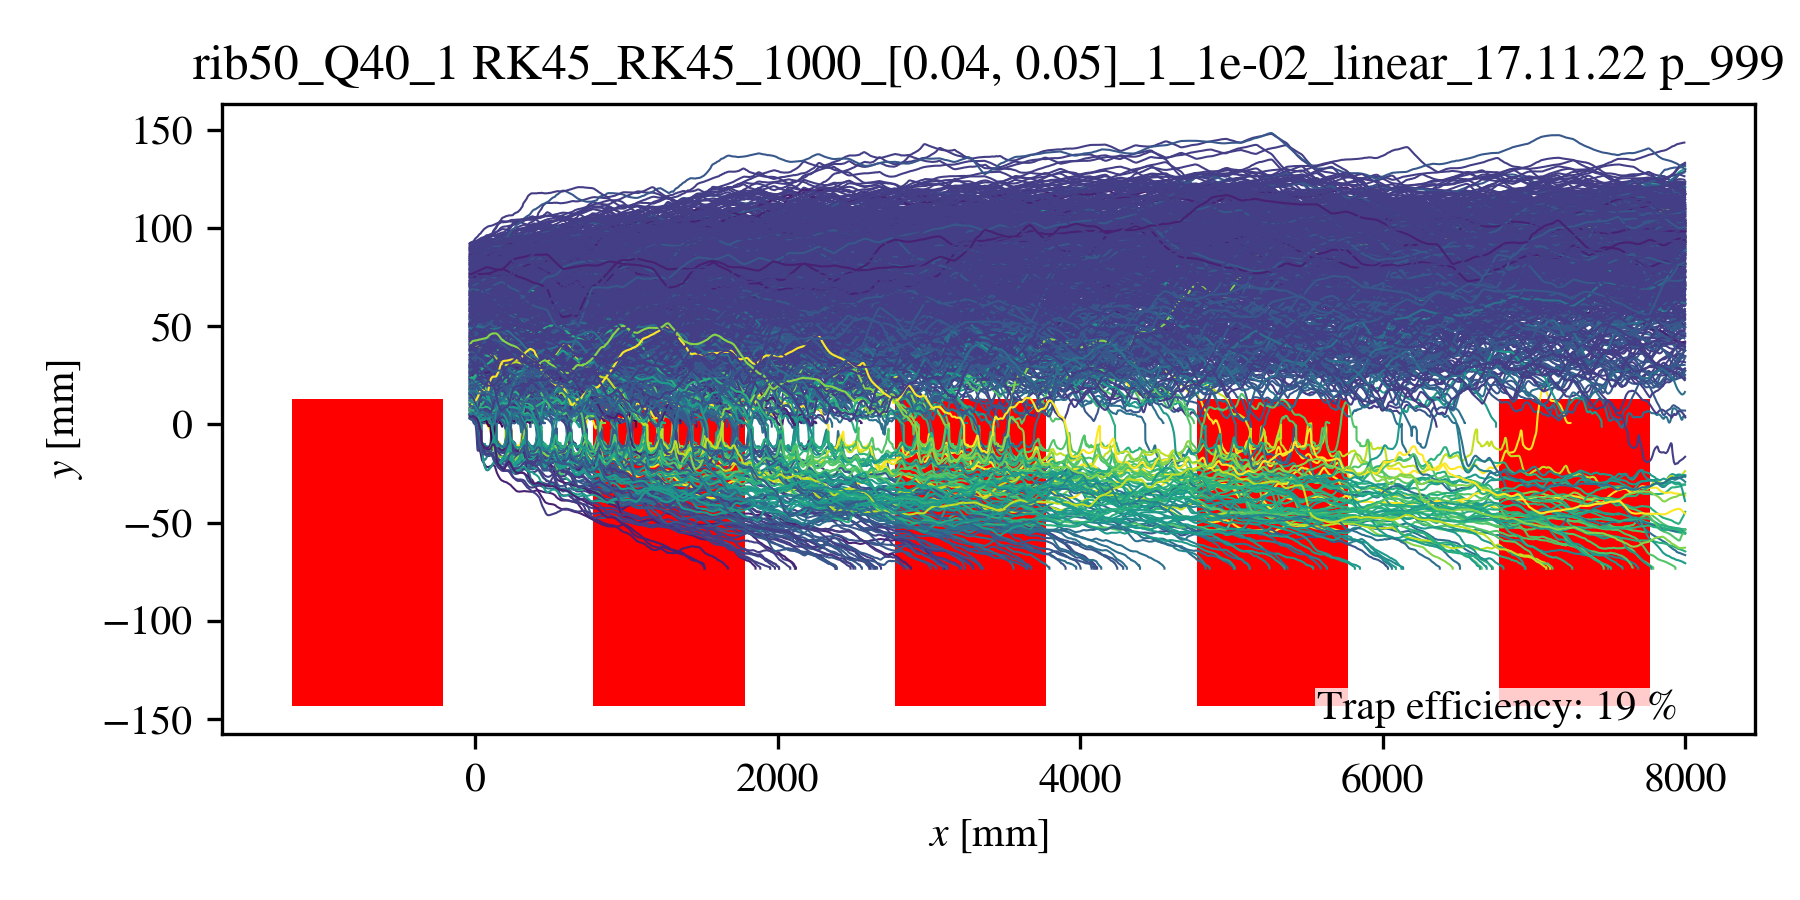

In [ ]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in sorted(Path("./runs/rib50_Q40_1_scale20/").rglob("*.11.22.pickle")):
   # if not partikkelfil.name == "RK45_RK45_50_[0.05, 0.06]_1_1e-02_linear_test25.10.22.pickle":
    #    continue
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)

    tider = {}
    max_time = 0
    for p in partiklar:
        tider[p.index] = p.sti_dict['time_usage'].seconds
        if tider[p.index] > max_time:
            max_time = tider[p.index]

    skalering = 1
    myDPI = 300
    with h5py.File(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"),'r') as fil:
        h5py_ribs = np.asarray(fil['ribs'])
    del fil

    ribs = []
    for r in h5py_ribs:
        ribs.append(Rib(r))
    
    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(1800/myDPI,900/myDPI),dpi=myDPI)
    ax.add_patch(Polygon(ribs[1].vertices- np.asarray([x_width, 0]), facecolor='red'))
    for i in range(int(8000/x_width)):
        ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))
        
    fanga = 0
    ufanga = 0

    for p in partiklar:
        # if p.index > 200:
        #     break
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])+np.asarray([sti[frame]['loops']*x_width,0,0,0])
        # if not np.any(plott_array[:,1]<1):
        #      continue
        if sti[final]['caught']:
            fanga += 1
        else:
            ufanga += 1
        # color = viridis((p.diameter-0.05)/0.01)
        color = viridis(tider[p.index]/max_time)
        ax.plot(plott_array[:,0], plott_array[:,1], linewidth=0.5, label=p.index, color=color)
    ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    ax.set_xlabel(r'$x$ [mm]')
    ax.set_ylabel(r'$y$ [mm]')
    ax.text(0.95, 0.01, f"Trap efficiency: {100*fanga/(ufanga+fanga):.0f} %",
        verticalalignment='bottom', horizontalalignment='right',bbox={'facecolor': 'white','edgecolor':'None', 'alpha': 0.8, 'pad': 0.5},
        transform=ax.transAxes)
    # ax.legend(ncol=6, loc=2, bbox_to_anchor=(0, -0.15))
    # if p.index > 0:
    plt.tight_layout()